Question -3
How does the price changes for neighbourhood throughout the year?
1. Plotting line graph to see the variation (Use average price of the same day to calculate the data)


In [804]:
# Imports
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import folium
import json
import re
from collections import Counter
from scipy import stats
import geopandas as gpd

In [805]:
# Arnesh
listings_filepath = '/Users/arneshsaha/Desktop/AirBnb/datasets/listings.csv'
listings_df = pd.read_csv(listings_filepath)

In [806]:
calendar_filepath = '/Users/arneshsaha/Desktop/AirBnb/datasets/calendar.csv'
calendar_df = pd.read_csv(calendar_filepath)

In [807]:
neighbourhoods_filepath = '/Users/arneshsaha/Desktop/AirBnb/datasets/neighbourhoods.csv'
neighbourhoods_df = pd.read_csv(neighbourhoods_filepath)

In [808]:
listings_for_calendar = listings_df.loc[:, ['id', 'neighbourhood_cleansed', 'latitude', 'longitude']]

In [809]:
calendar_df['listing_id'].nunique()

7389

In [810]:
# calendar_df = calendar_df['price'].dropna()
# calendar_df['price'] = calendar_df['price'].str.replace('$', '')  # Remove dollar sign
# calendar_df['price'] = calendar_df['price'].str.replace(',', '')  # Remove comma separators (if present)
# calendar_df['price'] = calendar_df['price'].astype(float).astype(int)  # Convert to float and then to int

calendar_df['price'] = calendar_df['price'].str.replace(',', '',regex=True).str.replace('$', '',regex=True).astype('float')


# calendar_df['date'] = pd.to_datetime(calendar_df['date'])
# # Group the data by date and calculate the mean price for each date
# avg_price_by_date = calendar_df.groupby('date')['price'].mean()

In [811]:
# Q1 = calendar_df['price'].quantile(0.25)
# Q3 = calendar_df['price'].quantile(0.75)
# IQR = Q3 - Q1

# # Define the lower and upper bounds for outlier detection
# lower_bound = Q1 - 1.5*IQR
# upper_bound = Q3 + 1.5*IQR

# # Identify and remove outliers
# calendar_df = calendar_df[(calendar_df['price'] >= lower_bound) & (calendar_df['price'] <= upper_bound)]

In [812]:
pivot_df = calendar_df.pivot(index='listing_id', columns='date', values='price')
pivot_df.to_csv('../datasets/pivot_df.csv')
pivot_df['2022-12-18']


listing_id
15420                 115.0
24288                  73.0
38628                  55.0
44009                  45.0
44552                  44.0
                      ...  
782136800346144859    350.0
782448596836883109    100.0
782474793883477230     35.0
782510024659134909     80.0
782521844972923104     95.0
Name: 2022-12-18, Length: 7389, dtype: float64

In [813]:
# merge the two dataframes on the id and listing_id columns
merged_df = pd.merge(pivot_df, listings_for_calendar, left_on='listing_id', right_on='id')
merged_df
# check if the id and listing_id columns match
# match = all(merged_df['id'] == merged_df['listing_id'])

# print(match)

,2022-12-16,2022-12-17,2022-12-18,2022-12-19,2022-12-20,2022-12-21,2022-12-22,2022-12-23,2022-12-24,2022-12-25,...,2023-12-11,2023-12-12,2023-12-13,2023-12-14,2023-12-15,2023-12-16,id,neighbourhood_cleansed,latitude,longitude
0,100.0,115.0,115.0,115.0,115.0,120.0,120.0,120.0,130.0,130.0,...,120.0,120.0,120.0,120.0,120.0,NaN,15420.0,"Old Town, Princes Street and Leith Street",55.95759,-3.18805
1,NaN,79.0,73.0,65.0,65.0,65.0,65.0,67.0,65.0,65.0,...,93.0,93.0,93.0,94.0,94.0,94.0,24288.0,"Canongate, Southside and Dumbiedykes",55.94383,-3.18445
2,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,...,55.0,55.0,55.0,55.0,55.0,NaN,38628.0,Joppa,55.94215,-3.09640
3,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,...,45.0,45.0,45.0,45.0,45.0,NaN,44009.0,Marchmont West,55.93800,-3.19468
4,NaN,42.0,44.0,44.0,44.0,44.0,44.0,42.0,42.0,56.0,...,39.0,39.0,39.0,39.0,42.0,42.0,44552.0,South Leith,55.96612,-3.17184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5274,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,...,55.0,55.0,55.0,55.0,55.0,NaN,54396993.0,Broughton South,55.96396,-3.18436
5275,128.0,128.0,128.0,125.0,125.0,125.0,185.0,185.0,185.0,185.0,...,125.0,125.0,125.0,125.0,125.0,NaN,54397730.0,Broughton South,55.96272,-3.18697
5276,244.0,176.0,140.0,140.0,140.0,140.0,140.0,228.0,261.0,186.0,...,154.0,154.0,154.0,154.0,262.0,NaN,54400868.0,"Old Town, Princes Street and Leith Street",55.95840,-3.18949
5277,25.0,25.0,20.0,20.0,20.0,20.0,20.0,25.0,25.0,20.0,...,20.0,20.0,20.0,20.0,25.0,NaN,54401487.0,Boswall and Pilton,55.97231,-3.22058


In [814]:

#Load the dataset
# quality_df = pd.read_csv('quality_data.csv')

# #Calculate the IQR
# Q1 = quality_df['price'].quantile(0.25)
# Q3 = quality_df['price'].quantile(0.75)
# IQR = Q3 - Q1

# # Define the lower and upper bounds for outlier detection
# lower_bound = Q1 - 1.5*IQR
# upper_bound = Q3 + 1.5*IQR

# # Identify and remove outliers
# quality_df = quality_df[(quality_df['price'] >= lower_bound) & (quality_df['price'] <= upper_bound)]

In [815]:
# pivot_df = pivot_df[~(pivot_df > 300).any(axis=1)]
# pivot_df

# merged_df = merged_df[~(merged_df > 300).any(axis=1)]
# merged_df

# int_cols = merged_df.select_dtypes(exclude=['int', 'float']).columns.tolist()
# print(int_cols)

# # drop the rows where any column has a value greater than 200, except for the non-int columns
# merged_df = merged_df[merged_df[int_cols].apply(lambda x: ~(x > 200).any(), axis=1)]

# specify the columns to exclude
cols_to_exclude = ['id', 'neighbourhood_cleansed', 'latitude', 'longitude']

# select all columns except the excluded ones
non_excluded_cols = [col for col in merged_df.columns if col not in cols_to_exclude]

# drop the rows where any column except the excluded ones has a value greater than 200
merged_df = merged_df[merged_df[non_excluded_cols].apply(lambda x: ~(x > 200).any(), axis=1)]
merged_df

,2022-12-16,2022-12-17,2022-12-18,2022-12-19,2022-12-20,2022-12-21,2022-12-22,2022-12-23,2022-12-24,2022-12-25,...,2023-12-11,2023-12-12,2023-12-13,2023-12-14,2023-12-15,2023-12-16,id,neighbourhood_cleansed,latitude,longitude
0,100.0,115.0,115.0,115.0,115.0,120.0,120.0,120.0,130.0,130.0,...,120.0,120.0,120.0,120.0,120.0,NaN,15420.0,"Old Town, Princes Street and Leith Street",55.95759,-3.18805
1,NaN,79.0,73.0,65.0,65.0,65.0,65.0,67.0,65.0,65.0,...,93.0,93.0,93.0,94.0,94.0,94.0,24288.0,"Canongate, Southside and Dumbiedykes",55.94383,-3.18445
2,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,...,55.0,55.0,55.0,55.0,55.0,NaN,38628.0,Joppa,55.94215,-3.09640
3,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,...,45.0,45.0,45.0,45.0,45.0,NaN,44009.0,Marchmont West,55.93800,-3.19468
4,NaN,42.0,44.0,44.0,44.0,44.0,44.0,42.0,42.0,56.0,...,39.0,39.0,39.0,39.0,42.0,42.0,44552.0,South Leith,55.96612,-3.17184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5270,85.0,86.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,...,102.0,102.0,102.0,104.0,104.0,NaN,54367908.0,Portobello,55.95902,-3.12034
5273,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,NaN,54389580.0,Gilmerton South and the Murrays,55.90147,-3.13801
5274,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,...,55.0,55.0,55.0,55.0,55.0,NaN,54396993.0,Broughton South,55.96396,-3.18436
5277,25.0,25.0,20.0,20.0,20.0,20.0,20.0,25.0,25.0,20.0,...,20.0,20.0,20.0,20.0,25.0,NaN,54401487.0,Boswall and Pilton,55.97231,-3.22058


In [816]:
# merged_df = merged_df[(merged_df > 300).any(axis=1)]
# merged_df
print(merged_df.columns)

Index(['2022-12-16', '2022-12-17', '2022-12-18', '2022-12-19', '2022-12-20',
       '2022-12-21', '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
       ...
       '2023-12-11', '2023-12-12', '2023-12-13', '2023-12-14', '2023-12-15',
       '2023-12-16', 'id', 'neighbourhood_cleansed', 'latitude', 'longitude'],
      dtype='object', length=370)


In [817]:
for cols in merged_df.columns:
    print(merged_df[cols].isna().count())

2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919
2919


In [818]:
# pivot_df.dropna(inplace=True)
merged_df = merged_df.fillna(merged_df.median()) 
merged_df


/var/folders/rv/l0bvb2qx7kj9z133h3zxt1040000gn/T/ipykernel_70396/1688827338.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_df = merged_df.fillna(merged_df.median())


,2022-12-16,2022-12-17,2022-12-18,2022-12-19,2022-12-20,2022-12-21,2022-12-22,2022-12-23,2022-12-24,2022-12-25,...,2023-12-11,2023-12-12,2023-12-13,2023-12-14,2023-12-15,2023-12-16,id,neighbourhood_cleansed,latitude,longitude
0,100.0,115.0,115.0,115.0,115.0,120.0,120.0,120.0,130.0,130.0,...,120.0,120.0,120.0,120.0,120.0,90.0,15420.0,"Old Town, Princes Street and Leith Street",55.95759,-3.18805
1,80.0,79.0,73.0,65.0,65.0,65.0,65.0,67.0,65.0,65.0,...,93.0,93.0,93.0,94.0,94.0,94.0,24288.0,"Canongate, Southside and Dumbiedykes",55.94383,-3.18445
2,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,...,55.0,55.0,55.0,55.0,55.0,90.0,38628.0,Joppa,55.94215,-3.09640
3,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,...,45.0,45.0,45.0,45.0,45.0,90.0,44009.0,Marchmont West,55.93800,-3.19468
4,80.0,42.0,44.0,44.0,44.0,44.0,44.0,42.0,42.0,56.0,...,39.0,39.0,39.0,39.0,42.0,42.0,44552.0,South Leith,55.96612,-3.17184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5270,85.0,86.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,...,102.0,102.0,102.0,104.0,104.0,90.0,54367908.0,Portobello,55.95902,-3.12034
5273,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,90.0,54389580.0,Gilmerton South and the Murrays,55.90147,-3.13801
5274,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,...,55.0,55.0,55.0,55.0,55.0,90.0,54396993.0,Broughton South,55.96396,-3.18436
5277,25.0,25.0,20.0,20.0,20.0,20.0,20.0,25.0,25.0,20.0,...,20.0,20.0,20.0,20.0,25.0,90.0,54401487.0,Boswall and Pilton,55.97231,-3.22058


In [819]:
merged_df.dropna(inplace=True)
merged_df

,2022-12-16,2022-12-17,2022-12-18,2022-12-19,2022-12-20,2022-12-21,2022-12-22,2022-12-23,2022-12-24,2022-12-25,...,2023-12-11,2023-12-12,2023-12-13,2023-12-14,2023-12-15,2023-12-16,id,neighbourhood_cleansed,latitude,longitude
0,100.0,115.0,115.0,115.0,115.0,120.0,120.0,120.0,130.0,130.0,...,120.0,120.0,120.0,120.0,120.0,90.0,15420.0,"Old Town, Princes Street and Leith Street",55.95759,-3.18805
1,80.0,79.0,73.0,65.0,65.0,65.0,65.0,67.0,65.0,65.0,...,93.0,93.0,93.0,94.0,94.0,94.0,24288.0,"Canongate, Southside and Dumbiedykes",55.94383,-3.18445
2,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,...,55.0,55.0,55.0,55.0,55.0,90.0,38628.0,Joppa,55.94215,-3.09640
3,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,...,45.0,45.0,45.0,45.0,45.0,90.0,44009.0,Marchmont West,55.93800,-3.19468
4,80.0,42.0,44.0,44.0,44.0,44.0,44.0,42.0,42.0,56.0,...,39.0,39.0,39.0,39.0,42.0,42.0,44552.0,South Leith,55.96612,-3.17184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5270,85.0,86.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,...,102.0,102.0,102.0,104.0,104.0,90.0,54367908.0,Portobello,55.95902,-3.12034
5273,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,90.0,54389580.0,Gilmerton South and the Murrays,55.90147,-3.13801
5274,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,...,55.0,55.0,55.0,55.0,55.0,90.0,54396993.0,Broughton South,55.96396,-3.18436
5277,25.0,25.0,20.0,20.0,20.0,20.0,20.0,25.0,25.0,20.0,...,20.0,20.0,20.0,20.0,25.0,90.0,54401487.0,Boswall and Pilton,55.97231,-3.22058


In [820]:
# Q1 = calendar_df['price'].quantile(0.25)
# Q3 = calendar_df['price'].quantile(0.75)
# IQR = Q3 - Q1

# # Define the lower and upper bounds for outlier detection
# lower_bound = Q1 - 1.5*IQR
# upper_bound = Q3 + 1.5*IQR

# filtered_df = pivot_df[~((pivot_df < (Q1 - 1.5 * IQR)) | (pivot_df > (Q3 + 1.5 * IQR))).any(axis=1)]
# filtered_df

In [821]:
grouped_df = merged_df.groupby('neighbourhood_cleansed').mean().reset_index().rename(columns={'neighbourhood_cleansed': 'neighbourhood'})
grouped_df

,neighbourhood,2022-12-16,2022-12-17,2022-12-18,2022-12-19,2022-12-20,2022-12-21,2022-12-22,2022-12-23,2022-12-24,...,2023-12-10,2023-12-11,2023-12-12,2023-12-13,2023-12-14,2023-12-15,2023-12-16,id,latitude,longitude
0,Abbeyhill,74.583333,75.138889,73.083333,72.388889,73.472222,73.194444,73.611111,74.611111,75.388889,...,81.722222,81.388889,81.388889,81.388889,81.472222,82.555556,90.138889,1.873262e+07,55.955156,-3.167044
1,Baberton and Juniper Green,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,...,56.333333,56.333333,56.333333,56.333333,56.333333,56.333333,90.000000,1.792011e+07,55.911730,-3.287153
2,Balerno and Bonnington Village,79.571429,79.571429,78.857143,78.857143,78.857143,78.857143,73.142857,73.857143,73.857143,...,84.142857,84.142857,84.142857,84.142857,84.142857,84.857143,90.000000,2.653759e+07,55.876611,-3.353850
3,Balgreen and Roseburn,104.315789,108.684211,106.736842,106.210526,106.210526,106.210526,107.052632,112.263158,112.052632,...,116.526316,116.421053,116.421053,116.421053,116.421053,116.473684,90.000000,3.806332e+07,55.942415,-3.249911
4,"Barnton, Cammo and Cramond South",140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,...,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,90.000000,1.910793e+07,55.962540,-3.306665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,Trinity,78.478261,78.478261,76.304348,76.304348,76.304348,76.304348,76.304348,77.826087,78.260870,...,76.826087,76.826087,76.826087,76.826087,76.826087,79.000000,90.000000,2.621304e+07,55.974631,-3.209344
106,Trinity East and The Dudleys,99.857143,99.857143,92.428571,90.642857,89.428571,90.428571,91.500000,98.571429,98.571429,...,96.428571,96.214286,96.214286,96.214286,96.142857,105.571429,90.000000,2.199894e+07,55.975570,-3.191336
107,West Pilton,53.250000,53.500000,48.125000,48.750000,49.375000,48.937500,49.437500,53.437500,54.062500,...,55.500000,54.812500,55.000000,55.000000,55.125000,58.625000,90.000000,3.530823e+07,55.971534,-3.241542
108,Western Harbour and Leith Docks,81.194444,81.611111,79.083333,79.416667,79.750000,81.277778,82.777778,86.611111,89.472222,...,86.222222,85.805556,85.805556,85.833333,85.805556,88.083333,89.722222,3.013367e+07,55.979859,-3.179339


In [822]:
# In grouped_df, the id column is not needed. The latitude and longitude columns in listings.df gives us the information about the location of each property in the neighbourhood.
# Thus I think we should drop the latitude and longitude columns from grouped_df. 
# Instead, we should have the geometry column from neighbourhoods.csv (It alrteady contains information about the latitiude and longitude of each property)
grouped_df.drop(columns=['id', 'latitude', 'longitude'], inplace=True)
grouped_df

,neighbourhood,2022-12-16,2022-12-17,2022-12-18,2022-12-19,2022-12-20,2022-12-21,2022-12-22,2022-12-23,2022-12-24,...,2023-12-07,2023-12-08,2023-12-09,2023-12-10,2023-12-11,2023-12-12,2023-12-13,2023-12-14,2023-12-15,2023-12-16
0,Abbeyhill,74.583333,75.138889,73.083333,72.388889,73.472222,73.194444,73.611111,74.611111,75.388889,...,81.472222,82.555556,82.638889,81.722222,81.388889,81.388889,81.388889,81.472222,82.555556,90.138889
1,Baberton and Juniper Green,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,...,56.333333,56.333333,56.333333,56.333333,56.333333,56.333333,56.333333,56.333333,56.333333,90.000000
2,Balerno and Bonnington Village,79.571429,79.571429,78.857143,78.857143,78.857143,78.857143,73.142857,73.857143,73.857143,...,84.142857,84.857143,84.857143,84.142857,84.142857,84.142857,84.142857,84.142857,84.857143,90.000000
3,Balgreen and Roseburn,104.315789,108.684211,106.736842,106.210526,106.210526,106.210526,107.052632,112.263158,112.052632,...,116.421053,116.473684,116.526316,116.526316,116.421053,116.421053,116.421053,116.421053,116.473684,90.000000
4,"Barnton, Cammo and Cramond South",140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,...,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,90.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,Trinity,78.478261,78.478261,76.304348,76.304348,76.304348,76.304348,76.304348,77.826087,78.260870,...,76.826087,79.000000,79.000000,76.826087,76.826087,76.826087,76.826087,76.826087,79.000000,90.000000
106,Trinity East and The Dudleys,99.857143,99.857143,92.428571,90.642857,89.428571,90.428571,91.500000,98.571429,98.571429,...,96.142857,105.571429,105.642857,96.428571,96.214286,96.214286,96.214286,96.142857,105.571429,90.000000
107,West Pilton,53.250000,53.500000,48.125000,48.750000,49.375000,48.937500,49.437500,53.437500,54.062500,...,54.875000,58.375000,58.500000,55.500000,54.812500,55.000000,55.000000,55.125000,58.625000,90.000000
108,Western Harbour and Leith Docks,81.194444,81.611111,79.083333,79.416667,79.750000,81.277778,82.777778,86.611111,89.472222,...,85.805556,88.083333,88.166667,86.222222,85.805556,85.805556,85.833333,85.805556,88.083333,89.722222


In [823]:
neighbourhoods_df.drop(columns=['neighbourhood_group'], inplace=True)
# Convert the geometry column to a GeoSeries object
geometry2 = gpd.GeoSeries.from_wkt(neighbourhoods_df['geometry'])
# Create a geopandas dataframe with the geometry column
neighbourhoods_gdf = gpd.GeoDataFrame(neighbourhoods_df, geometry=geometry2)
type(neighbourhoods_gdf.geometry)



geopandas.geoseries.GeoSeries

In [824]:
# grouped_df_nbd: neighbourhoods_gdf['geometry'] merged with grouped_df
grouped_df_nbd = neighbourhoods_gdf.merge(grouped_df, on='neighbourhood')
grouped_df_nbd.drop(grouped_df_nbd.columns[0], axis=1, inplace=True)
print(type(grouped_df_nbd.geometry))
grouped_df_nbd


<class 'geopandas.geoseries.GeoSeries'>


,neighbourhood,geometry,2022-12-16,2022-12-17,2022-12-18,2022-12-19,2022-12-20,2022-12-21,2022-12-22,2022-12-23,...,2023-12-07,2023-12-08,2023-12-09,2023-12-10,2023-12-11,2023-12-12,2023-12-13,2023-12-14,2023-12-15,2023-12-16
0,Balerno and Bonnington Village,"MULTIPOLYGON (((-3.35805 55.91088, -3.35950 55...",79.571429,79.571429,78.857143,78.857143,78.857143,78.857143,73.142857,73.857143,...,84.142857,84.857143,84.857143,84.142857,84.142857,84.142857,84.142857,84.142857,84.857143,90.0
1,Currie West,"MULTIPOLYGON (((-3.30557 55.92039, -3.30418 55...",56.750000,57.000000,57.125000,58.375000,58.625000,59.125000,59.125000,61.000000,...,60.750000,60.875000,60.875000,60.875000,60.750000,60.750000,60.750000,60.750000,60.875000,90.0
2,Currie East,"MULTIPOLYGON (((-3.30808 55.89430, -3.30870 55...",60.800000,60.800000,58.400000,61.400000,61.400000,61.400000,61.400000,55.400000,...,61.000000,63.000000,63.000000,61.000000,61.000000,61.000000,61.000000,61.000000,63.000000,90.0
3,Baberton and Juniper Green,"MULTIPOLYGON (((-3.28635 55.91564, -3.28617 55...",53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,...,56.333333,56.333333,56.333333,56.333333,56.333333,56.333333,56.333333,56.333333,56.333333,90.0
4,Bonaly and The Pentlands,"MULTIPOLYGON (((-3.30808 55.89430, -3.30834 55...",83.916667,83.916667,84.833333,81.916667,82.583333,82.583333,82.583333,83.750000,...,86.000000,85.666667,85.750000,86.333333,86.000000,86.000000,86.000000,86.000000,85.666667,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,South Gyle,"MULTIPOLYGON (((-3.30084 55.94246, -3.30081 55...",75.444444,77.111111,77.111111,74.333333,77.111111,77.111111,78.222222,79.888889,...,81.777778,82.666667,82.666667,82.000000,81.777778,81.777778,81.777778,81.777778,82.666667,90.0
106,"Ratho, Ingliston and Gogar","MULTIPOLYGON (((-3.34287 55.96432, -3.34150 55...",111.000000,111.000000,105.047619,104.571429,104.571429,104.809524,104.571429,108.380952,...,104.047619,110.619048,110.666667,104.190476,104.047619,104.047619,104.047619,104.047619,110.619048,90.0
107,Queensferry West,"MULTIPOLYGON (((-3.41600 55.99385, -3.41582 55...",60.000000,60.000000,59.250000,59.250000,59.250000,59.250000,59.250000,65.750000,...,54.250000,56.500000,56.500000,55.000000,54.250000,54.250000,54.250000,54.250000,56.500000,90.0
108,"Dalmeny, Kirkliston and Newbridge","MULTIPOLYGON (((-3.29012 55.99545, -3.28998 55...",74.750000,74.166667,73.750000,74.500000,74.333333,76.166667,75.166667,75.583333,...,74.083333,74.666667,74.750000,74.333333,74.083333,74.083333,74.083333,74.083333,74.666667,90.0


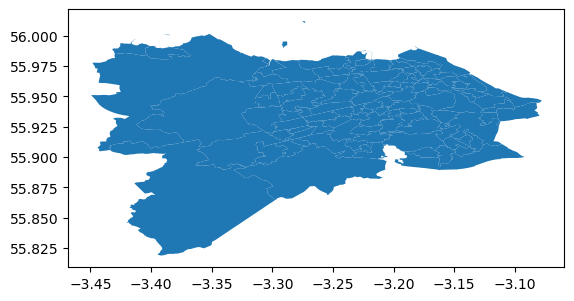

In [825]:
grouped_df_nbd.plot()
grouped_df_nbd.to_csv('../datasets/grouped_df_nbd.csv')

Working on price fluctuation based on neighbourhood

In [826]:
# Trying to do a standard deviation column for each neighbourhood's mean price fluctuation
price_cols = [col for col in grouped_df_nbd.columns if col.startswith('20')]

# Calculate the standard deviation of the mean price across all dates for each neighbourhood
grouped_df_nbd['price_std'] = grouped_df_nbd[price_cols].std(axis=1)
grouped_df_nbd

,neighbourhood,geometry,2022-12-16,2022-12-17,2022-12-18,2022-12-19,2022-12-20,2022-12-21,2022-12-22,2022-12-23,...,2023-12-08,2023-12-09,2023-12-10,2023-12-11,2023-12-12,2023-12-13,2023-12-14,2023-12-15,2023-12-16,price_std
0,Balerno and Bonnington Village,"MULTIPOLYGON (((-3.35805 55.91088, -3.35950 55...",79.571429,79.571429,78.857143,78.857143,78.857143,78.857143,73.142857,73.857143,...,84.857143,84.857143,84.142857,84.142857,84.142857,84.142857,84.142857,84.857143,90.0,2.897341
1,Currie West,"MULTIPOLYGON (((-3.30557 55.92039, -3.30418 55...",56.750000,57.000000,57.125000,58.375000,58.625000,59.125000,59.125000,61.000000,...,60.875000,60.875000,60.875000,60.750000,60.750000,60.750000,60.750000,60.875000,90.0,3.324971
2,Currie East,"MULTIPOLYGON (((-3.30808 55.89430, -3.30870 55...",60.800000,60.800000,58.400000,61.400000,61.400000,61.400000,61.400000,55.400000,...,63.000000,63.000000,61.000000,61.000000,61.000000,61.000000,61.000000,63.000000,90.0,3.713476
3,Baberton and Juniper Green,"MULTIPOLYGON (((-3.28635 55.91564, -3.28617 55...",53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,...,56.333333,56.333333,56.333333,56.333333,56.333333,56.333333,56.333333,56.333333,90.0,2.944455
4,Bonaly and The Pentlands,"MULTIPOLYGON (((-3.30808 55.89430, -3.30834 55...",83.916667,83.916667,84.833333,81.916667,82.583333,82.583333,82.583333,83.750000,...,85.666667,85.750000,86.333333,86.000000,86.000000,86.000000,86.000000,85.666667,90.0,2.527854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,South Gyle,"MULTIPOLYGON (((-3.30084 55.94246, -3.30081 55...",75.444444,77.111111,77.111111,74.333333,77.111111,77.111111,78.222222,79.888889,...,82.666667,82.666667,82.000000,81.777778,81.777778,81.777778,81.777778,82.666667,90.0,4.361375
106,"Ratho, Ingliston and Gogar","MULTIPOLYGON (((-3.34287 55.96432, -3.34150 55...",111.000000,111.000000,105.047619,104.571429,104.571429,104.809524,104.571429,108.380952,...,110.619048,110.666667,104.190476,104.047619,104.047619,104.047619,104.047619,110.619048,90.0,3.960458
107,Queensferry West,"MULTIPOLYGON (((-3.41600 55.99385, -3.41582 55...",60.000000,60.000000,59.250000,59.250000,59.250000,59.250000,59.250000,65.750000,...,56.500000,56.500000,55.000000,54.250000,54.250000,54.250000,54.250000,56.500000,90.0,3.454749
108,"Dalmeny, Kirkliston and Newbridge","MULTIPOLYGON (((-3.29012 55.99545, -3.28998 55...",74.750000,74.166667,73.750000,74.500000,74.333333,76.166667,75.166667,75.583333,...,74.666667,74.750000,74.333333,74.083333,74.083333,74.083333,74.083333,74.666667,90.0,1.898763


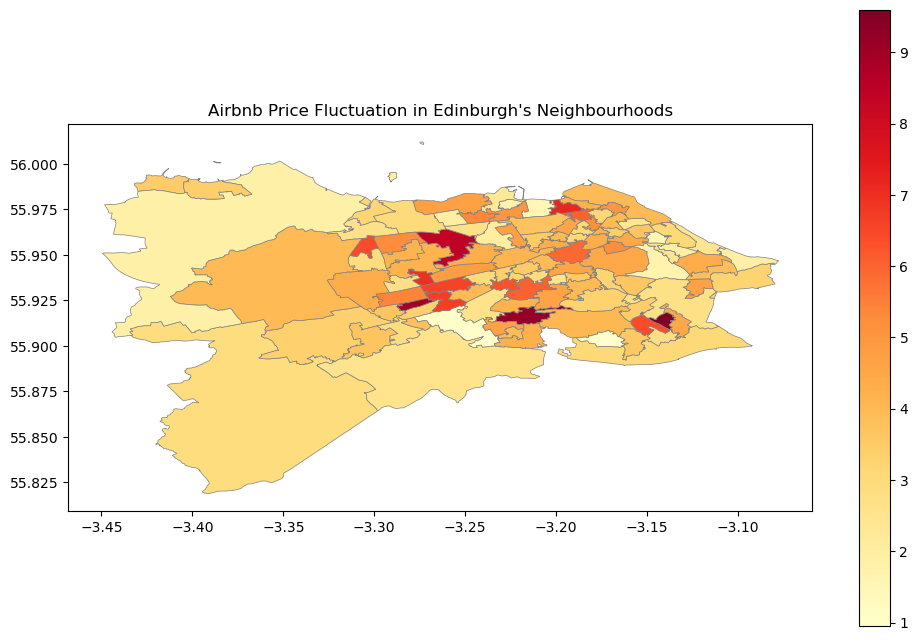

In [827]:
fig, ax = plt.subplots(1, figsize=(12, 8))
grouped_df_nbd.plot(column='price_std', cmap='YlOrRd', linewidth=0.5, edgecolor='gray', legend=True, ax=ax)
ax.set_title("Airbnb Price Fluctuation in Edinburgh's Neighbourhoods")
plt.show()